<a href="https://colab.research.google.com/github/Phruetti/sc607703-1/blob/main/%E0%B9%81%E0%B8%A5%E0%B8%9B%2026/07/65.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd #นำเข้าไลบราลีสำหรับเก็บขอ้มูลในรูปแบบของ data frame
from google.colab import files 
uploaded = files.upload() #ไฟล์ข้อมูลที่เลือกเป็นไฟล์ csv (ในเคสตัวอย่างนี้เราใช้ iris.csv)

Saving iris.csv to iris.csv


In [6]:
import io
df2 = pd.read_csv(io.BytesIO(uploaded['iris.csv']))
type(df2)

pandas.core.frame.DataFrame

การรันโค้ด R ใน Python runtime

In [3]:
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [8]:
%R -i df2 #เนื่องจาก df2 เป็น data frame จาก pandas ดังนั้นเพื่อให้เราสามาารถจะรันโดยใช้โค้ด R กับ df2 ได้เราจะทำการ copy df2 เพื้อใช้สำหรับ R โดยใช้คำสั่งต่อไปนี้

In [10]:
import pandas as pd
from google.colab import files
uploaded = files.upload()
import io
df2 = pd.read_csv(io.BytesIO(uploaded['iris.csv']))
type(df2)

Saving iris.csv to iris (2).csv


pandas.core.frame.DataFrame

In [11]:
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [12]:
%R -i df2

In [13]:
%%R
matrix = data.matrix(df2[1:5,1:2], rownames.force = NA)
matrix
cov(matrix)

             sepal.length sepal.width
sepal.length       0.0430      0.0365
sepal.width        0.0365      0.0670


In [43]:

%%R
df1 = data.frame(CustomerId = c(1:6), Product = c("Oven","Television","Mobile","WashingMachine","Lightings","Ipad"))
df1

  CustomerId        Product
1          1           Oven
2          2     Television
3          3         Mobile
4          4 WashingMachine
5          5      Lightings
6          6           Ipad


In [71]:
%%R
df2 = data.frame(CustomerId = c(2,4,6,7,8), state = c("caalifornia","newyork","santiago","texas","Indiana"))
df2

  CustomerId       state
1          2 caalifornia
2          4     newyork
3          6    santiago
4          7       texas
5          8     Indiana


In [42]:
%%R
library('dplyr')

In [72]:
%%R
#ID เหมือนกัน
df_ij1 = inner_join(df1,df2,by='CustomerId')
df_ij1

  CustomerId        Product       state
1          2     Television caalifornia
2          4 WashingMachine     newyork
3          6           Ipad    santiago


In [73]:
%%R
df_ij2 = df1 %>%inner_join(df2,by='CustomerId')
df_ij1

  CustomerId        Product       state
1          2     Television caalifornia
2          4 WashingMachine     newyork
3          6           Ipad    santiago


In [74]:
%%R
#outer join in R ร่วมกัน
df_u= full_join(df1,df2,by="CustomerId",all=TRUE)
df_u

  CustomerId        Product       state
1          1           Oven        <NA>
2          2     Television caalifornia
3          3         Mobile        <NA>
4          4 WashingMachine     newyork
5          5      Lightings        <NA>
6          6           Ipad    santiago
7          7           <NA>       texas
8          8           <NA>     Indiana


In [75]:
%%R
#outer join in R ร่วมกัน
df_u1=df1 %>% full_join(y=df2,by="CustomerId",all=TRUE)
df_u1

  CustomerId        Product       state
1          1           Oven        <NA>
2          2     Television caalifornia
3          3         Mobile        <NA>
4          4 WashingMachine     newyork
5          5      Lightings        <NA>
6          6           Ipad    santiago
7          7           <NA>       texas
8          8           <NA>     Indiana


In [76]:
#outer join in R ร่วมกัน
%%R
df_u3=merge(x=df1,y=df2,by="CustomerId",all=TRUE)
df_u3

  CustomerId        Product       state
1          1           Oven        <NA>
2          2     Television caalifornia
3          3         Mobile        <NA>
4          4 WashingMachine     newyork
5          5      Lightings        <NA>
6          6           Ipad    santiago
7          7           <NA>       texas
8          8           <NA>     Indiana


In [77]:
#left joion
%%R
df_f= left_join(df1,df2,by="CustomerId")
df_f

  CustomerId        Product       state
1          1           Oven        <NA>
2          2     Television caalifornia
3          3         Mobile        <NA>
4          4 WashingMachine     newyork
5          5      Lightings        <NA>
6          6           Ipad    santiago


In [78]:
#right joion
%%R
df_f= right_join(df1,df2,by="CustomerId")
df_f

  CustomerId        Product       state
1          2     Television caalifornia
2          4 WashingMachine     newyork
3          6           Ipad    santiago
4          7           <NA>       texas
5          8           <NA>     Indiana


IMpott iris.csv

In [79]:
import pandas as pd
from google.colab import files
uploaded = files.upload()
import io
df2 = pd.read_csv(io.BytesIO(uploaded['iris.csv']))

Saving iris.csv to iris (3).csv


คัดลอก df2 คัดลอกให้สามารถใช้ใน R ได้

In [83]:
%R-i df2
%R df2

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


In [82]:
%%R
summary(df2)

  sepal.length    sepal.width     petal.length    petal.width   
 Min.   :4.300   Min.   :2.000   Min.   :1.000   Min.   :0.100  
 1st Qu.:5.100   1st Qu.:2.800   1st Qu.:1.600   1st Qu.:0.300  
 Median :5.800   Median :3.000   Median :4.350   Median :1.300  
 Mean   :5.843   Mean   :3.057   Mean   :3.758   Mean   :1.199  
 3rd Qu.:6.400   3rd Qu.:3.300   3rd Qu.:5.100   3rd Qu.:1.800  
 Max.   :7.900   Max.   :4.400   Max.   :6.900   Max.   :2.500  
   variety         
 Length:150        
 Class :character  
 Mode  :character  
                   
                   
                   


In [85]:
%%R
summary(df_u[,2:3])

   Product             state          
 Length:8           Length:8          
 Class :character   Class :character  
 Mode  :character   Mode  :character  


In [88]:
#คำสั่ง glimpes
%%R
glimpse(df_u)

Rows: 8
Columns: 3
$ CustomerId <dbl> 1, 2, 3, 4, 5, 6, 7, 8
$ Product    <chr> "Oven", "Television", "Mobile", "WashingMachine", "Lighting…
$ state      <chr> NA, "caalifornia", NA, "newyork", NA, "santiago", "texas", …


การบ้าน

ข้อที่ 1.1

In [ ]:
%%R
x = matrix(c(3,4,2,6,8,2,5,5,5.5,4,7,10,5,7.7),7,2)
x

     [,1] [,2]
[1,]    3  5.0
[2,]    4  5.5
[3,]    2  4.0
[4,]    6  7.0
[5,]    8 10.0
[6,]    2  5.0
[7,]    5  7.7


In [ ]:

%%R
xbar=colMeans(x)
print(xbar)
s=cov(x)
print(s)

[1] 4.285714 6.314286
         [,1]     [,2]
[1,] 4.904762 4.345238
[2,] 4.345238 4.241429


In [ ]:
%%R
s[1,1]

[1] 4.241429


In [ ]:
%%R
s[2,2]

[1] 4.345238


ข้อทที่ 1.2

In [ ]:
%%R
x=matrix(c(1,2,3,3,4,5,6,8,9,11,18.95,19.00,17.95,15.54,14.00,12.95,8.94,7.49,6.00,3.99),10,2)
print(x)

      [,1]  [,2]
 [1,]    1 18.95
 [2,]    2 19.00
 [3,]    3 17.95
 [4,]    3 15.54
 [5,]    4 14.00
 [6,]    5 12.95
 [7,]    6  8.94
 [8,]    8  7.49
 [9,]    9  6.00
[10,]   11  3.99


In [ ]:
scatter plot

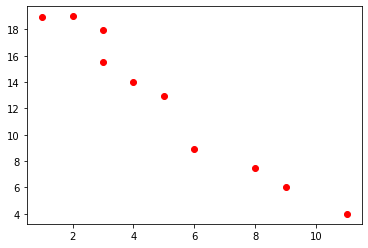

In [ ]:
import matplotlib.pyplot as plt
x1=(1,2,3,3,4,5,6,8,9,11)
x2=(18.95,19.00,17.95,15.54,14.00,12.95,8.94,7.49,6.00,3.99)
plt.scatter(x1,x2,c="red") #scattet plot

<BarContainer object of 10 artists>

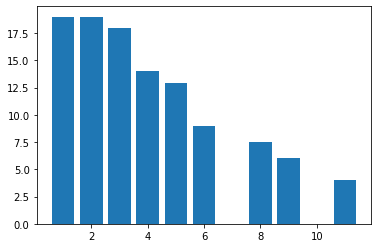

In [ ]:
plt.bar(x1,x2) #diagram

In [ ]:
%%R
s=cov(x)
s
s[1,1]
s[2,2]
s[1,2]

[1] -17.71022


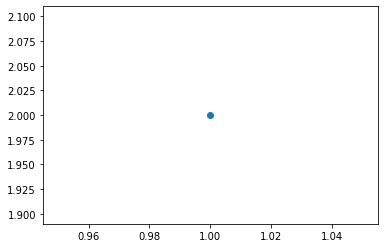

In [ ]:

plt.scatter([1],[2])

In [ ]:
%%R
r=cor(x)
print(r)


           [,1]       [,2]
[1,]  1.0000000 -0.9782684
[2,] -0.9782684  1.0000000


In [ ]:
%%R
r[1,2]

[1] -0.9782684


1.4